In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer

In [3]:
DATA = '/Users/krishnakalyan3/Educational/PumpIt/data/original'

In [30]:
train_x = pd.read_csv(DATA + 'train_set_values.csv')
train_y = pd.read_csv(DATA + 'train_set_labels.csv')
test_x = pd.read_csv(DATA + 'test_set_labels.csv')

`permit` has many NA values and is boolean. Hence handing it in the begining

In [160]:
train_x['permit'].value_counts()
train_x['permit'] = train_x['permit'].fillna(True)

In [161]:
drop_cols = ['id']

In [162]:
train_x_drop = train_x.drop(drop_cols, axis=1)
train_x_drop_nafill = train_x_drop.fillna('NaN')

In [163]:
#train_x_drop_nafill.dtypes

### Pre Processing
- Handle NAs
- Impute Missing Values
- Label Encoder to encode cateorigical values
- Random Forest Feature Importance

In [164]:
df = train_x_drop_nafill

In [165]:
objects_col = []
for c in df.columns:
        if df[c].dtype == 'object':
            objects_col.append(c)
            lbl = LabelEncoder()
            lbl.fit(list(df[c].values))
            df[c] = lbl.transform(list(df[c].values))

In [168]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,6000.0,47,1370,1390,1519,34.938093,-9.856322,37399,0,1,...,0,6,2,1,1,8,6,0,1,1
1,0.0,309,469,1399,545,34.698766,-2.147466,37195,0,4,...,2,6,2,2,2,5,3,1,1,1
2,25.0,300,825,686,2049,37.460664,-3.821329,14572,0,5,...,5,6,2,1,1,0,1,1,2,1
3,0.0,272,1742,263,1853,38.486161,-11.155298,37285,0,7,...,2,6,2,0,0,3,0,0,2,1
4,0.0,104,20,0,119,31.130847,-1.825359,35529,0,4,...,2,6,2,3,3,5,3,1,1,1


In [169]:
lbl = LabelEncoder()
lbl.fit(train_y['status_group'])
y_hat = lbl.transform(train_y['status_group'])

In [170]:
samples = 10000
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(df[:samples], y_hat[:samples])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [171]:
top_n = 100
feature_importance = m.feature_importances_
indices = np.argsort(importances)
features = df.columns.values

In [172]:
for k,v in zip(importances[indices], features[indices]):
    print('{} = {}'.format(v, k))

recorded_by = 0.0
num_private = 0.0007082904119359219
water_quality = 0.003267358871379927
payment_type = 0.00333863218875345
source_type = 0.0034388127774135553
management = 0.005358930473321598
public_meeting = 0.009310608006830434
source = 0.010601854570086078
extraction_type = 0.01062527052820038
payment = 0.011984109074623314
extraction_type_class = 0.012581736577944586
basin = 0.012958758626124015
construction_year = 0.01315067937914273
quantity_group = 0.01399248037311326
region = 0.014352047327923995
region_code = 0.014461605148201015
scheme_management = 0.015055522091560487
amount_tsh = 0.016418380843373426
district_code = 0.017933163023993493
management_group = 0.018074148446237417
scheme_name = 0.02155452102609242
extraction_type_group = 0.023300409478713115
population = 0.024088210558865186
installer = 0.025006869397163067
lga = 0.025814271229579477
gps_height = 0.028409612617952003
funder = 0.02964697318342734
ward = 0.03608889200822944
waterpoint_type = 0.0383797524392448

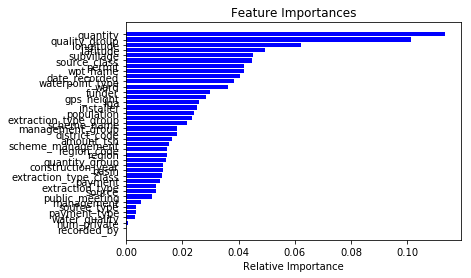

In [173]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

### Conclusions 
- The top 3 featuers are `quantity_group`, `quantity` and `lat/long`
- `recorded_by` dosent seem to be a useful variable
- Building the model with top `10` variable should be a good start
- Might make sence to try to understand  `quantity_group`, `quantity`
1. quantity - The quantity of water
2. quantity_group - The quantity of water